In [6]:
from sqlalchemy import create_engine,text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
db_user = ""
db_password = ""
db_host = "" 
db_port = ""  
db_name = ""

In [8]:
connection = f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"
engine = create_engine(connection)

In [9]:
query_datavalue = text("SELECT DATE(datefrom) AS date, SUM(datavalue) AS datavalue FROM movements GROUP BY date ORDER BY date;")
try:
    with engine.connect() as connection:
        chunks = pd.read_sql(query_datavalue, connection, chunksize=1000) 
        df_datavalue = pd.concat(chunks, ignore_index=True) 
    print(df_datavalue)
except Exception as e:
    print(f"Errore durante l'esecuzione della query: {e}")

          date  datavalue
0   2019-08-01    6196481
1   2019-08-02    5980888
2   2019-08-03    5568629
3   2019-08-04    4698935
4   2019-08-05    5621312
..         ...        ...
56  2019-09-26    6688862
57  2019-09-27    6556703
58  2019-09-28    6339631
59  2019-09-29    5380908
60  2019-09-30    6641932

[61 rows x 2 columns]


GRAFICO LINEARE DELL'ANDAMENTO GIORNALIERO

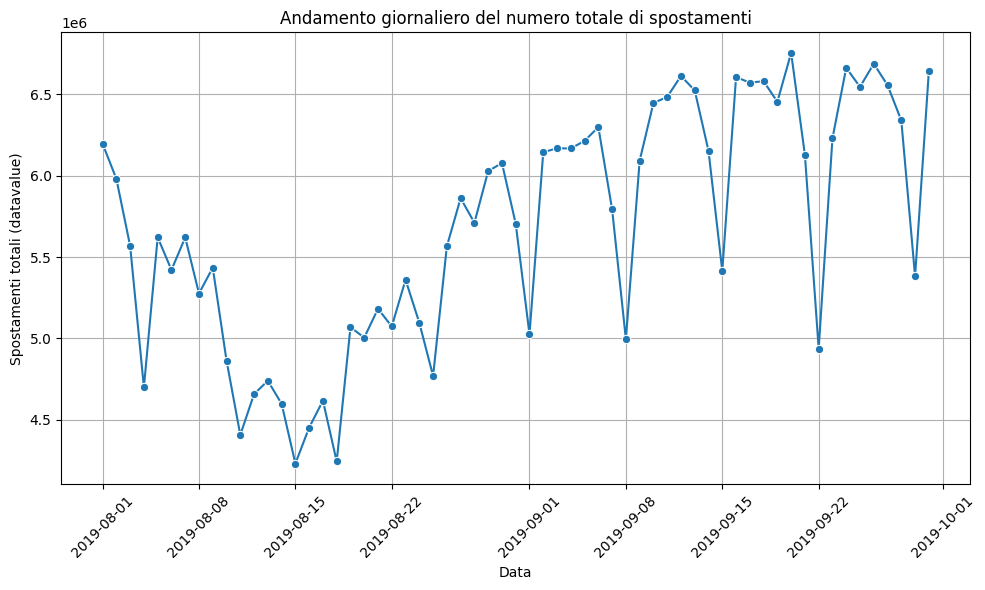

In [90]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_datavalue, x='date', y='datavalue', marker='o')
plt.title("Andamento giornaliero del numero totale di spostamenti")
plt.xlabel("Data")
plt.ylabel("Spostamenti totali (datavalue)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Media mobile (rolling average)

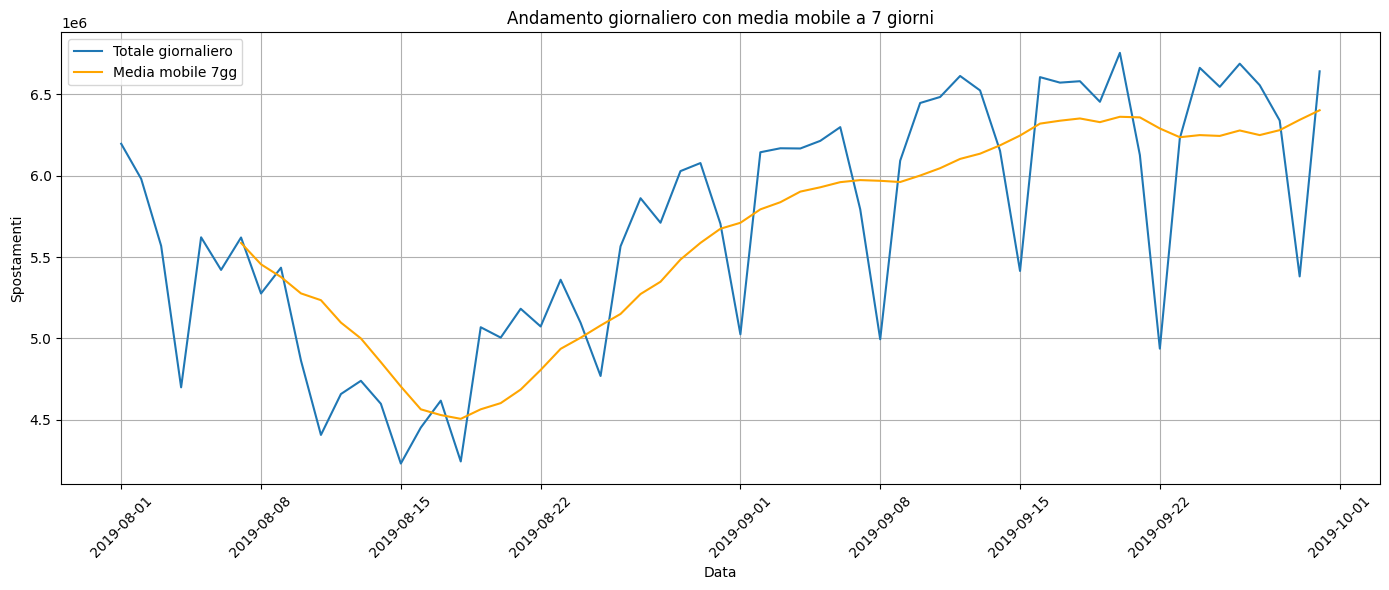

In [17]:
df_datavalue['media_mobile_7gg'] = df_datavalue['datavalue'].rolling(window=7).mean()

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_datavalue, x='date', y='datavalue', label='Totale giornaliero')
sns.lineplot(data=df_datavalue, x='date', y='media_mobile_7gg', label='Media mobile 7gg', color='orange')
plt.title("Andamento giornaliero con media mobile a 7 giorni")
plt.xlabel("Data")
plt.ylabel("Spostamenti")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Analisi per giorno della settimana

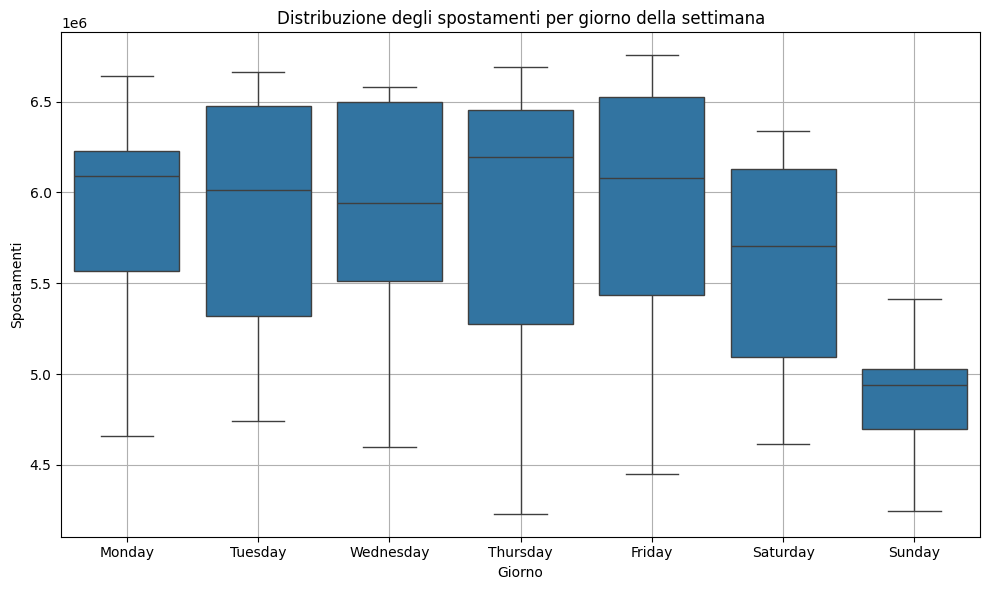

In [21]:
df_datavalue['weekday'] = pd.to_datetime(df_datavalue['date']).dt.day_name()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_datavalue, x='weekday', y='datavalue',
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Distribuzione degli spostamenti per giorno della settimana")
plt.xlabel("Giorno")
plt.ylabel("Spostamenti")
plt.grid(True)
plt.tight_layout()
plt.show()


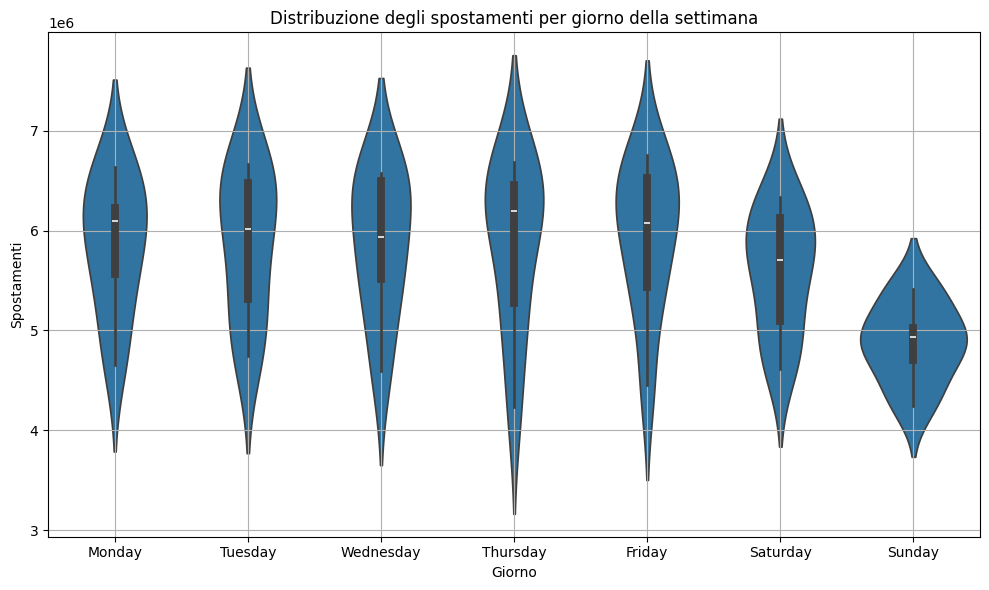

In [101]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_datavalue, x='weekday', y='datavalue',
               order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Distribuzione degli spostamenti per giorno della settimana")
plt.xlabel("Giorno")
plt.ylabel("Spostamenti")
plt.grid(True)
plt.tight_layout()
plt.show()
